In [2]:
# import the packages
import numpy as np
import pandas as pd

In [3]:
#read the excel file
su = pd.read_excel('exam_performance.xlsx')

In [6]:
#To show first 5 data
su.head()

,gender,race,class,studying_hour,monthly_income,school_ranking,anxiety_level,math_score,reading_score,writing_score
0,female,group1,class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,male,group1,class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,female,group1,class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,male,group1,class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,female,group1,class1,NaN,9243.939276,Middle Level,-1.712281,30.787309,19.759846,NaN


In [7]:
#To show last 5 data
su.tail()

,gender,race,class,studying_hour,monthly_income,school_ranking,anxiety_level,math_score,reading_score,writing_score
195,female,group3,class4,4.0,11172.893812,Low Level,-0.513441,25.953372,17.527060,16.388111
196,female,group3,class4,9.0,7438.077155,Top Level,-1.801260,34.968144,NaN,NaN
197,female,group3,class4,11.0,12382.600169,Low Level,-2.274089,26.950892,18.037510,21.576306
198,female,group3,class4,11.0,8486.852603,Middle Level,-2.754368,36.836072,17.652504,21.630075
199,female,group3,class4,5.0,9906.251713,Middle Level,-0.711730,27.067902,39.190756,13.653809


In [8]:
su.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          200 non-null    object 
 1   race            200 non-null    object 
 2   class           200 non-null    object 
 3   studying_hour   179 non-null    float64
 4   monthly_income  200 non-null    float64
 5   school_ranking  200 non-null    object 
 6   anxiety_level   181 non-null    float64
 7   math_score      184 non-null    float64
 8   reading_score   177 non-null    float64
 9   writing_score   178 non-null    float64
dtypes: float64(6), object(4)
memory usage: 15.8+ KB


**Step 1:** Fixing the title

In [9]:
#Fixing the title
su.columns = su.columns.str.title()
print(su.columns)

Index(['Gender', 'Race', 'Class', 'Studying_Hour', 'Monthly_Income',
       'School_Ranking', 'Anxiety_Level', 'Math_Score', 'Reading_Score',
       'Writing_Score'],
      dtype='object')


In [10]:
#To show repairing title
su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,female,group1,class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,male,group1,class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,female,group1,class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,male,group1,class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,female,group1,class1,NaN,9243.939276,Middle Level,-1.712281,30.787309,19.759846,NaN


**Step 2**: Checking the duplicates

In [11]:
su.duplicated().sum()

1

In [12]:
su.duplicated() #we have 200 row

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [13]:
su.drop_duplicates() #after this function we have 199 row, so duplicated row is deleted

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,female,group1,class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,male,group1,class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,female,group1,class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,male,group1,class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,female,group1,class1,NaN,9243.939276,Middle Level,-1.712281,30.787309,19.759846,NaN
...,...,...,...,...,...,...,...,...,...,...
195,female,group3,class4,4.0,11172.893812,Low Level,-0.513441,25.953372,17.527060,16.388111
196,female,group3,class4,9.0,7438.077155,Top Level,-1.801260,34.968144,NaN,NaN
197,female,group3,class4,11.0,12382.600169,Low Level,-2.274089,26.950892,18.037510,21.576306
198,female,group3,class4,11.0,8486.852603,Middle Level,-2.754368,36.836072,17.652504,21.630075


**Step 3:** Geting rid of the unnecessary strings

In [14]:
for i in su.select_dtypes(include = 'object').columns:
    print(su[i].value_counts())

female    122
male       63
feMAle      9
MAle        6
Name: Gender, dtype: int64
group1    137
group2     33
group3     23
GROUP1      5
GROUP2      2
Name: Race, dtype: int64
class1    108
class2     44
class3     29
class4     19
Name: Class, dtype: int64
Middle Level    116
Top Level        43
Low Level        33
Middle leVel      4
Top leVel         2
Low leVel         2
Name: School_Ranking, dtype: int64


In [15]:
su['Gender'].loc[su['Gender'] == 'MAle'] = 'Male' #replace the MAle's with Male
su['Gender'].loc[su['Gender'] == 'male'] = 'Male' #replace the male's with Male
su['Gender'].loc[su['Gender'] == 'female'] = 'Female' #replace the female's with Female
su['Gender'].loc[su['Gender'] == 'feMAle'] = 'Female' #replace the feMAle's with Female
su['Gender'] = su['Gender'].str.title() #Make them title 
su['Gender'].value_counts()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Female    131
Male       69
Name: Gender, dtype: int64

In [16]:
su['Race'].loc[su['Race'] == 'GROUP1'] = 'Group1' #replace the GROUP1's with Group1
su['Race'].loc[su['Race'] == 'GROUP2'] = 'Group2' #replace the GROUP2's with Group2
su['Race'] = su['Race'].str.title() #Make them title 
su['Race'].value_counts()

Group1    142
Group2     35
Group3     23
Name: Race, dtype: int64

In [17]:
su['School_Ranking'].loc[su['School_Ranking'] == 'Middle leVel'] = 'Middle Level' #replace the Middle leVel's with Middle Level
su['School_Ranking'].loc[su['School_Ranking'] == 'Top leVel'] = 'Top Level' #replace the Top leVel's with TopLevel
su['School_Ranking'].loc[su['School_Ranking'] == 'Low leVel'] = 'Low Level' #replace the Low leVel's with Low Level
su['School_Ranking'] = su['School_Ranking'].str.title() #Make them title 
su['School_Ranking'].value_counts()

Middle Level    120
Top Level        45
Low Level        35
Name: School_Ranking, dtype: int64

In [18]:
su['Class'] = su['Class'].str.title() #Make them title
su['Class'].value_counts()

Class1    108
Class2     44
Class3     29
Class4     19
Name: Class, dtype: int64

**Step 4 :** Geting rid of the unnecessary white space

In [19]:
for i in su.select_dtypes(include = 'object'):
    su[i] = su[i].str.strip()

In [20]:
#The frequency table shows that Gender,Class, Race, and School_Ranking have unnecessary white spaces in the values.
su['Gender'] = su['Gender'].str.strip() 
su['Class'] = su['Class'].str.strip()  
su['Race'] = su['Race'].str.strip()    
su['School_Ranking'] = su['School_Ranking'].str.strip() 
print(su['Gender'].value_counts())
print(su['Class'].value_counts())
print(su['Race'].value_counts())
print(su['School_Ranking'].value_counts())

Female    131
Male       69
Name: Gender, dtype: int64
Class1    108
Class2     44
Class3     29
Class4     19
Name: Class, dtype: int64
Group1    142
Group2     35
Group3     23
Name: Race, dtype: int64
Middle Level    120
Top Level        45
Low Level        35
Name: School_Ranking, dtype: int64


In [21]:
su['Gender'].value_counts() #remove the white spaces in the string values
su['Race'].value_counts()   #remove the white spaces in the string values
su['Class'].value_counts()  #remove the white spaces in the string values
su['School_Ranking'].value_counts() #remove the white spaces in the string values

Middle Level    120
Top Level        45
Low Level        35
Name: School_Ranking, dtype: int64

**Step 5:** Numerical Data Analysis

In [22]:
su.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Studying_Hour,179.0,1.959744e+06,1.055265e+07,1.000000,6.000000,7.000000,10.000000,58465465.0
Monthly_Income,200.0,1.926508e+06,9.982446e+06,2451.881502,8201.010258,10085.038361,12085.766715,58465465.0
Anxiety_Level,181.0,1.938080e+06,1.049587e+07,-4.082515,-2.042107,-1.372541,-0.802567,58465465.0
Math_Score,184.0,1.906513e+06,1.041239e+07,21.949373,28.416814,30.910363,34.413927,58465465.0
Reading_Score,177.0,1.981905e+06,1.061036e+07,10.091073,21.977387,26.036779,29.391109,58465465.0
Writing_Score,178.0,1.970764e+06,1.058138e+07,11.662533,17.065347,19.259150,21.165300,58465465.0


In [71]:
mean1 = su['Studying_Hour'].mean() 
mean1


1753971.42

In [46]:
mean_for_studying_hour = su['Studying_Hour'].values.mean()
su['Studying_Hour'] = su['Studying_Hour'].fillna(mean_for_studying_hour)

In [38]:
mean2 = su['Monthly_Income'].mean()
mean2

1926508.081829073

In [47]:
mean_for_monthly_income = su['Monthly_Income'].values.mean()
su['Monthly_Income'] = su['Monthly_Income'].fillna(mean_for_monthly_income)


In [33]:
mean3 = su['Anxiety_Level'].mean()
mean3

1938080.2142668655

In [48]:
mean_for_anxiety_level = su['Anxiety_Level'].values.mean()
su['Anxiety_Level'] = su['Anxiety_Level'].fillna(mean_for_anxiety_level)

In [36]:
mean4 = su['Math_Score'].mean()
mean4

1906512.9182830062

In [49]:
mean_for_math_score =su['Math_Score'].values.mean()
su['Math_Score'] = su['Math_Score'].fillna(mean_for_math_score)

In [35]:
mean5 = su['Reading_Score'].mean()
mean5

1981904.5692129428

In [50]:
mean_for_reading_score = su['Reading_Score'].values.mean()
su['Reading_Score'] = su['Reading_Score'].fillna(mean_for_reading_score)

In [37]:
mean6 = su['Writing_Score'].mean()
mean6

1970764.4102951554

In [51]:
mean_for_writing_score = su['Writing_Score'].values.mean()
su['Writing_Score'] = su['Writing_Score'].fillna(mean_for_writing_score)

**Step 6:** Missing Analysis

**"isnull"** works for to show missing values. While isnull returns True for missing values and False for existing value

In [58]:
#To show missing value 
su.isnull()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,True,True
197,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False


In [59]:
#Sum of 'null' value
su.isnull().sum()

Gender             0
Race               0
Class              0
Studying_Hour      0
Monthly_Income     0
School_Ranking     0
Anxiety_Level     19
Math_Score        16
Reading_Score     23
Writing_Score     22
dtype: int64

In [60]:
#Missing Percentage 
new_df = pd.DataFrame(su.isnull().sum())
new_df.columns = ['Missing Number']
new_df['Missing Percentage'] = (new_df['Missing Number']*100)/su.shape[0]
new_df

,Missing Number,Missing Percentage
Gender,0,0.0
Race,0,0.0
Class,0,0.0
Studying_Hour,0,0.0
Monthly_Income,0,0.0
School_Ranking,0,0.0
Anxiety_Level,19,9.5
Math_Score,16,8.0
Reading_Score,23,11.5
Writing_Score,22,11.0


In [9]:
#Total number of missing observations 
su.isnull().sum().sum()

101

In [10]:
#import the package
import seaborn as sns

In [11]:
sns.set_theme()
sns.set(rc={"figure.dpi":130, "figure.figsize":(8,4)})


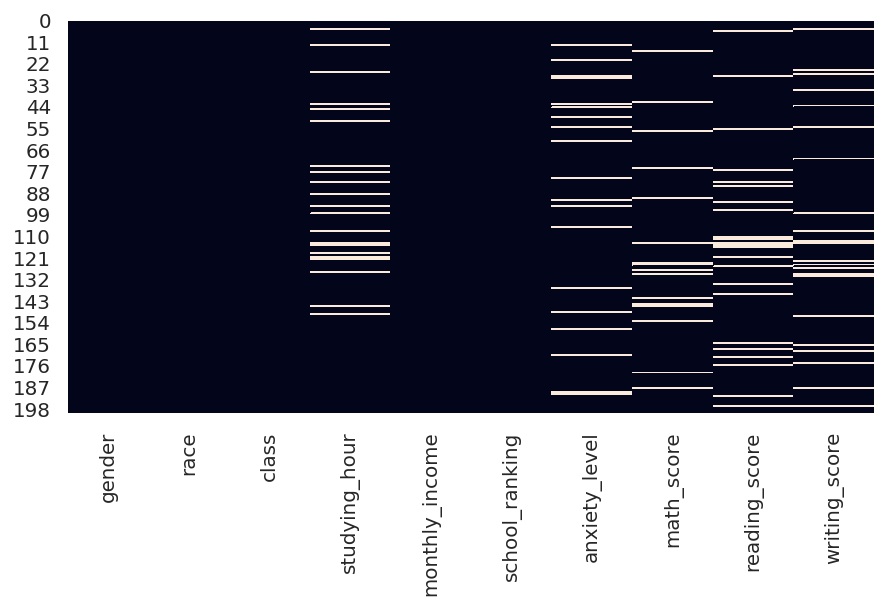

In [12]:
#visualizing of null values
sns.heatmap(su.isnull() ,cbar = False)

To resolve "Null" values, we can either delete these rows or fill them with the appropriate data. If the number of "null" values were very small, we could drop them, but since this would cause data loss, it would be better to fill them depending on whether the data is categorical or numeric.

**Should we use which method?**

Althogh it depends on the task, we can still make a generalization about these three imputation methods. If the numerical variables does not have any outlier, mean imputation can be used. If it has outlier observations, we can impute the median value instead of mean. On the other hand, if the missing value occurs in the object type variable. Then, we can use mode imputation. Mode imputation can be an option for a numerical variable when it has an approximately symmetric distribution.

In [56]:
#import the packages
import numpy as np
import pandas as pd

In [57]:
median_studying_hour = su['Studying_Hour'].median()

su['Studying_Hour'] =su['Studying_Hour'].fillna(median_studying_hour)

su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,Female,Group1,Class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,Female,Group1,Class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,-1.712281,30.787309,19.759846,NaN


In [61]:
median_monthly_income = su['Monthly_Income'].median()

su['Monthly_Income'] =su['Monthly_Income'].fillna(median_monthly_income)

su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,Female,Group1,Class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,Female,Group1,Class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,-1.712281,30.787309,19.759846,NaN


In [62]:
median_anxiety_level = su['Anxiety_Level'].median()

su['Anxiety_Level'] =su['Anxiety_Level'].fillna(median_anxiety_level)

su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,Female,Group1,Class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,Female,Group1,Class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,-1.712281,30.787309,19.759846,NaN


In [63]:
median_math_score = su['Math_Score'].median()

su['Math_Score'] =su['Math_Score'].fillna(median_math_score)

su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,Female,Group1,Class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,Female,Group1,Class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,-1.712281,30.787309,19.759846,NaN


In [64]:
median_reading_score = su['Reading_Score'].median()

su['Reading_Score'] =su['Reading_Score'].fillna(median_reading_score)

su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,Female,Group1,Class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,Female,Group1,Class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,-1.712281,30.787309,19.759846,NaN


In [65]:
median_writing_score = su['Writing_Score'].median()

su['Writing_Score'] =su['Writing_Score'].fillna(median_writing_score)

su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,Female,Group1,Class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,Female,Group1,Class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,-1.712281,30.787309,19.759846,19.259150


In [66]:
mode_for_gender = su['Gender'].mode() #gives you the level with highest frequency 

su['Gender'] = su['Gender'].fillna(mode_for_gender)

su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,Female,Group1,Class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,Female,Group1,Class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,-1.712281,30.787309,19.759846,19.259150


In [67]:
mode_for_race = su['Race'].mode() #gives you the level with highest frequency 

su['Race'] = su['Race'].fillna(mode_for_race)

su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,Female,Group1,Class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,Female,Group1,Class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,-1.712281,30.787309,19.759846,19.259150


In [68]:
mode_for_class = su['Class'].mode() #gives you the level with highest frequency 

su['Class'] = su['Class'].fillna(mode_for_class)

su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,Female,Group1,Class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,Female,Group1,Class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,-1.712281,30.787309,19.759846,19.259150


In [69]:
mode_for_school_ranking = su['School_Ranking'].mode() #gives you the level with highest frequency 

su['School_Ranking'] = su['School_Ranking'].fillna(mode_for_school_ranking)

su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score
0,Female,Group1,Class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,Female,Group1,Class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,-1.712281,30.787309,19.759846,19.259150


In [76]:
abs_for_anxiety_level = su['Anxiety_Level'].abs() #absolute value of 'Anxiety_Level'

su['Anxiety_Level'] = su['Anxiety_Level'].abs()

su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score,Anxiety_Leve
0,Female,Group1,Class1,9.0,7274.388964,Top Level,1.885454,33.911273,25.704466,21.397077,1.885454
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,3.099724,30.805942,24.531330,19.395260,3.099724
2,Female,Group1,Class1,11.0,8520.821204,Top Level,2.654007,34.330911,28.911692,19.641871,2.654007
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,2.397245,24.319956,25.257689,19.584474,2.397245
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,1.712281,30.787309,19.759846,19.259150,1.712281


**Step 7:** Data Object

In [77]:
su.head()

,Gender,Race,Class,Studying_Hour,Monthly_Income,School_Ranking,Anxiety_Level,Math_Score,Reading_Score,Writing_Score,Anxiety_Leve
0,Female,Group1,Class1,9.0,7274.388964,Top Level,1.885454,33.911273,25.704466,21.397077,1.885454
1,Male,Group1,Class1,13.0,9069.311737,Middle Level,3.099724,30.805942,24.531330,19.395260,3.099724
2,Female,Group1,Class1,11.0,8520.821204,Top Level,2.654007,34.330911,28.911692,19.641871,2.654007
3,Male,Group1,Class1,9.0,9329.650475,Middle Level,2.397245,24.319956,25.257689,19.584474,2.397245
4,Female,Group1,Class1,7.0,9243.939276,Middle Level,1.712281,30.787309,19.759846,19.259150,1.712281


In [78]:
su.to_excel('su_clean.xlsx')